In [1]:
%run FedStateCommon.ipynb

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Jul/2021 23:59:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Jul/2021 23:59:23] "GET /getCalendar HTTP/1.1" 200 -
127.0.0.1 - - [27/Jul/2021 23:59:23] "GET /static/historicNpl.png?1627423163645 HTTP/1.1" 200 -
127.0.0.1 - - [27/Jul/2021 23:59:31] "GET /readArticle?sda=20210616 HTTP/1.1" 200 -
127.0.0.1 - - [27/Jul/2021 23:59:32] "GET /readArticle?sda=20210428 HTTP/1.1" 200 -
127.0.0.1 - - [27/Jul/2021 23:59:35] "GET /deltaArticles?sda0=20210616&sda1=20210428 HTTP/1.1" 200 -
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
127.0.0.1 - - [28/Jul/2021 00:00:25] "GET /ckeckUpdate HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2021 00:00:25] 

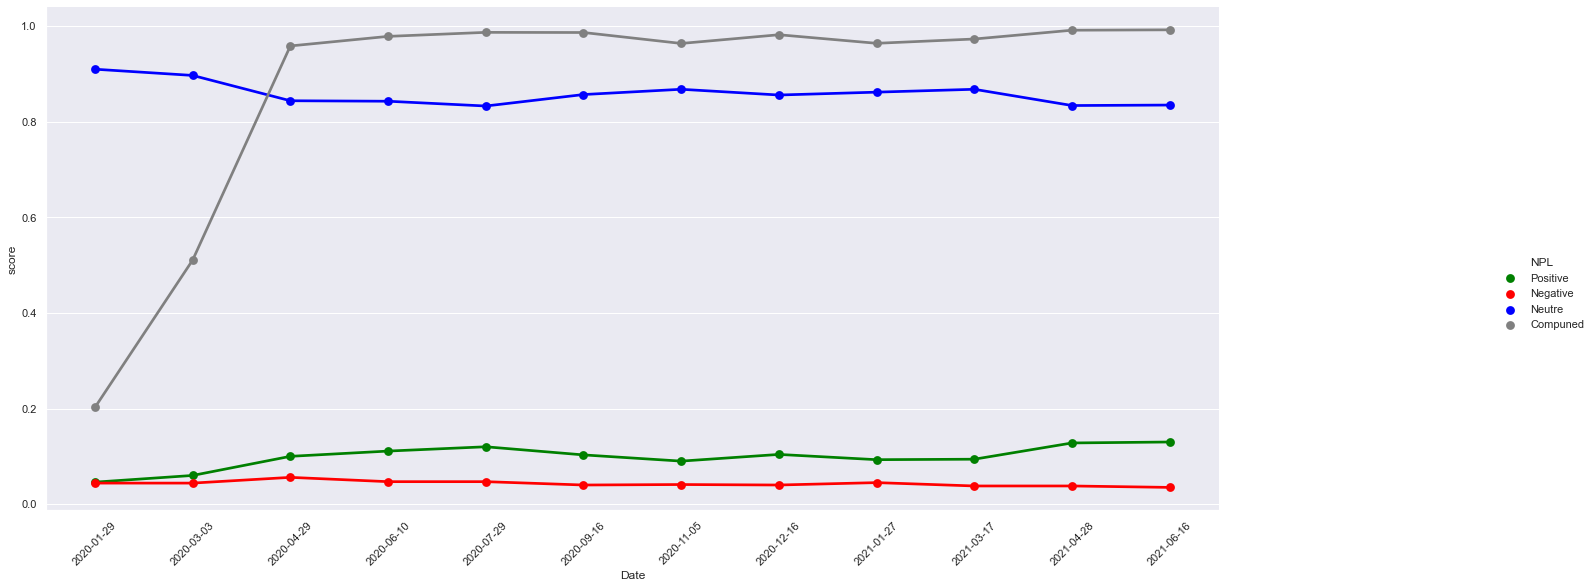

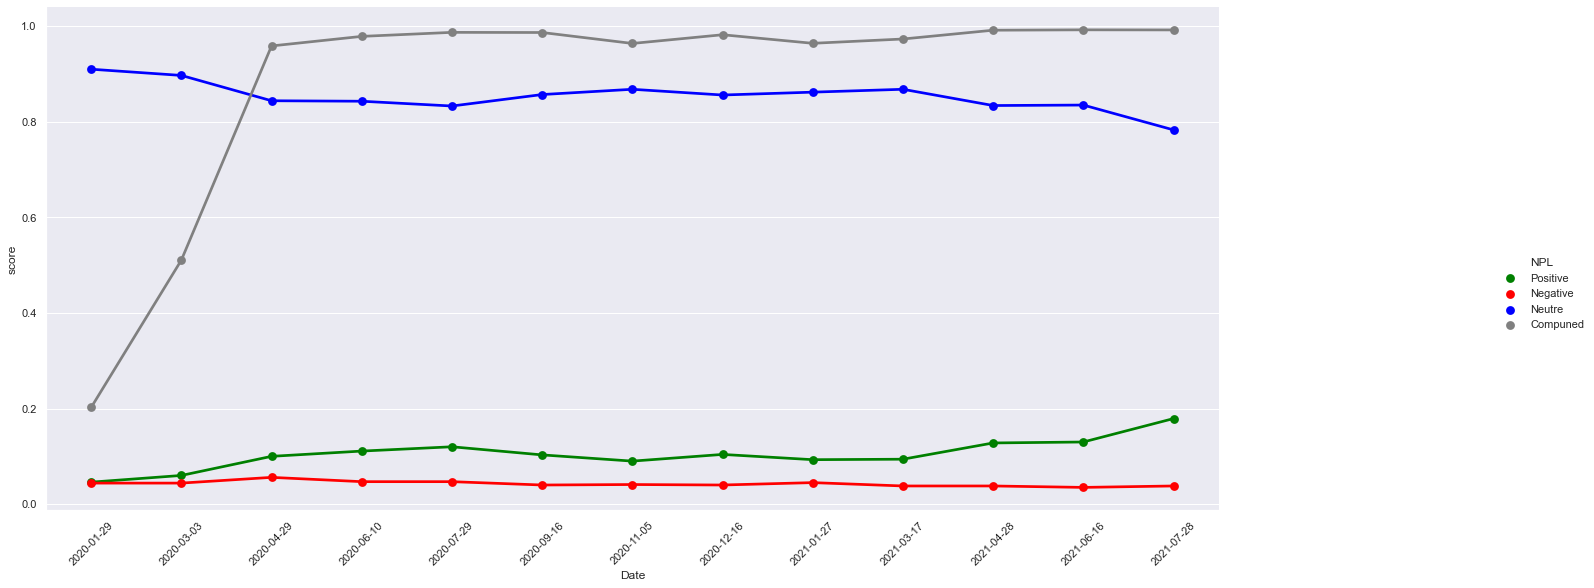

In [2]:
from flask import Flask, request, render_template, render_template_string,jsonify, make_response
from werkzeug.exceptions import HTTPException
import os
import traceback


startupArticles()
generateNPLGraph()
app = Flask(__name__)


@app.route('/')
def index():
    return render_template("fedDelta.txt")

@app.route('/getCalendar')
def getCalendar():
    dates = []
    dateRegex = re.compile(r'(\d\d\d\d\d\d\d\d)')
    for datedFile in os.listdir('fedStates/'):
        if dateRegex.search(datedFile):
            dates.append(datedFile)
    dates.sort(reverse=True)
    res = jsonify(dates) 
    return res

@app.route('/ckeckUpdate')
def ckeckUpdate():
    res = dailyCheckArticle()
    res = jsonify(res)
    return res


@app.route('/readArticle')
def readArticle():
    try:
        sdate = request.args.get('sda')
        res =  extractArticle(sdate)
        res = jsonify(res) 
    except :
        res = jsonify(traceback.format_exc()) 
    return res

@app.route('/deltaArticles')
def deltaArticles():
    try:
        sdate0 = request.args.get('sda0')
        sdate1 = request.args.get('sda1')
    
        res = calculateDeltaArticles(sdate0, sdate1)
        res = jsonify(res) 
    except:
        res = jsonify(traceback.format_exc()) 
    return res

def shutdown_server():
    func = request.environ.get('werkzeug.server.shutdown')
    if func is None:
        raise RuntimeError('Not running with the Werkzeug Server')
    func()

@app.route('/quit')
def shutdown():
    shutdown_server()
    return 'Server shutting down...'
    
    
if __name__ == '__main__':
    #app.debug = True
    app.run() #debug=True 